In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import tensorflow as tf
from tensorflow import keras
os.chdir('C:\\Users\\leekj\\Desktop\\programming\\learn_python\\tensorflow')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train = X_train.reshape(-1, 28*28)/255.
X_test = X_test.reshape(-1, 28*28)/255.
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [4]:
model = Sequential()
model.add(Dense(10, input_shape=(784,),activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 1s 511us/step - loss: 0.4374 - acc: 0.8829
Epoch 2/100
1875/1875 [==============================] - 1s 491us/step - loss: 0.3027 - acc: 0.9157
Epoch 3/100
1875/1875 [==============================] - 1s 500us/step - loss: 0.2896 - acc: 0.9204
Epoch 4/100
1875/1875 [==============================] - 1s 492us/step - loss: 0.2849 - acc: 0.9234
Epoch 5/100
1875/1875 [==============================] - 1s 490us/step - loss: 0.2818 - acc: 0.9247
Epoch 6/100
1875/1875 [==============================] - 1s 495us/step - loss: 0.2796 - acc: 0.9261
Epoch 7/100
1875/1875 [==============================] - 1s 487us/step - loss: 0.2790 - acc: 0.9270
Epoch 8/100
1875/1875 [==============================] - 1s 494us/step - loss: 0.2784 - acc: 0.9279
Epoch 9/100
1875/1875 [==============================] - 1s 487us/step - loss: 0.2786 - acc: 0.9285
Epoch 10/100
1875/1875 [==============================] - 1s 502us/step - loss: 0.2780 - acc: 0.9291

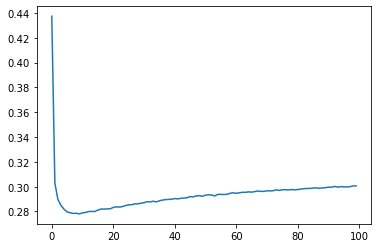

In [6]:
plt.plot(model.history.history['loss'])

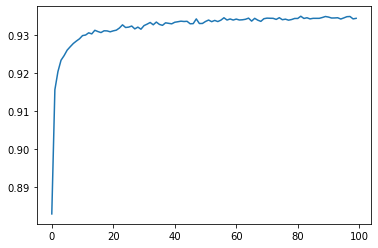

In [7]:
plt.plot(model.history.history['acc'])

In [8]:
model.predict(X_test)

array([[1.2164822e-11, 1.3237303e-21, 2.6338801e-12, ..., 9.9998879e-01,
        2.0769929e-11, 1.0292645e-05],
       [7.4160442e-07, 2.2354909e-08, 9.9999106e-01, ..., 0.0000000e+00,
        6.6786017e-16, 1.1280285e-36],
       [1.9468821e-12, 9.9753714e-01, 1.8170780e-03, ..., 1.7097969e-09,
        4.3255315e-04, 7.1190467e-09],
       ...,
       [2.6832500e-15, 2.5259416e-18, 1.3014482e-12, ..., 7.9228904e-04,
        4.5872214e-03, 2.5092132e-02],
       [1.8977060e-17, 1.3305164e-15, 1.1852008e-17, ..., 1.5414961e-15,
        1.6361487e-03, 3.3082807e-16],
       [5.0689158e-15, 9.6689318e-36, 5.2761143e-13, ..., 2.6035169e-23,
        4.4139655e-19, 1.1810417e-23]], dtype=float32)

In [11]:
pred_y = model.predict(X_test)
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.925

In [30]:
ws = model.get_weights()
ws[0].shape, ws[1].shape

((784, 10), (10,))

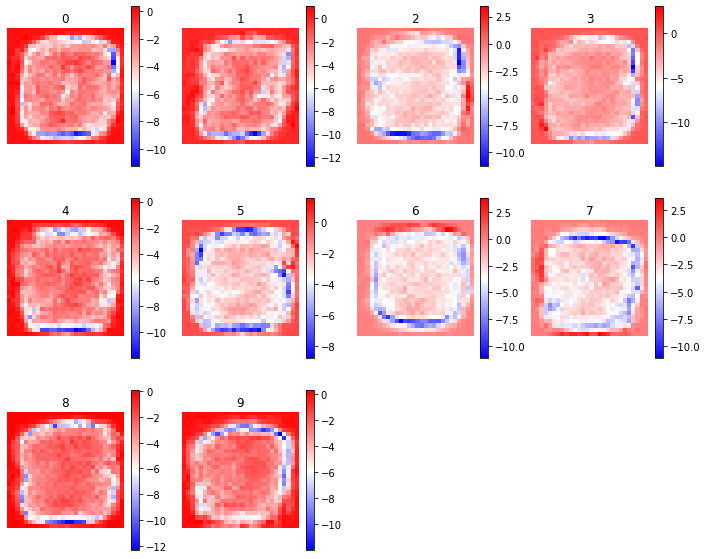

In [34]:
plt.figure(figsize=[12,10])

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(ws[0][:,i].reshape(28, 28), cmap='bwr')
    plt.axis('off')
    plt.title(i)
    plt.colorbar()

In [35]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, y_train, epochs=10, batch_size = 128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3121 - acc: 0.9038 - val_loss: 0.1758 - val_acc: 0.9473
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1241 - acc: 0.9620 - val_loss: 0.1023 - val_acc: 0.9686
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0834 - acc: 0.9739 - val_loss: 0.0941 - val_acc: 0.9721
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0644 - acc: 0.9800 - val_loss: 0.0972 - val_acc: 0.9728
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0478 - acc: 0.9845 - val_loss: 0.1300 - val_acc: 0.9680
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0387 - acc: 0.9879 - val_loss: 0.1057 - val_acc: 0.9748
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0314 - acc: 0.9900 - val_loss: 0.1223 - val_acc: 0.9737
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 0.

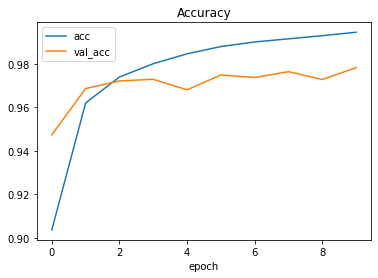

In [41]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(['acc','val_acc'])

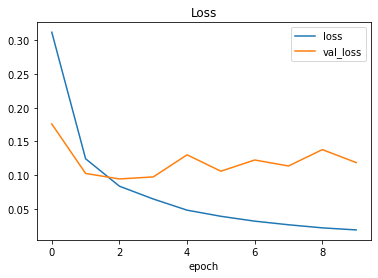

In [42]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(['loss','val_loss'])

In [43]:
model.save('mnist_model_01.h5') # creates a HDF5 file

In [44]:
from keras.models import load_model
model2 = load_model('mnist_model_01.h5')

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [46]:
model2.predict(X_test)

array([[1.32408372e-11, 1.27987551e-10, 8.37268260e-07, ...,
        9.99995112e-01, 3.01595993e-09, 3.50655512e-07],
       [5.29701301e-26, 5.99819538e-14, 1.00000000e+00, ...,
        2.39220866e-19, 4.07358405e-20, 1.09476474e-27],
       [3.05939695e-14, 9.99999881e-01, 1.26177357e-09, ...,
        1.64958038e-07, 3.24656853e-08, 2.91497798e-11],
       ...,
       [1.59211362e-20, 8.19851660e-17, 1.14785610e-18, ...,
        5.80822228e-13, 3.16836677e-17, 7.22600313e-11],
       [1.00094444e-19, 2.89556641e-19, 2.75832200e-21, ...,
        2.50474061e-17, 1.29283997e-12, 6.60103237e-15],
       [4.24671328e-20, 1.24336340e-28, 1.25137439e-24, ...,
        5.22666683e-31, 4.04362982e-18, 2.94164313e-22]], dtype=float32)

In [47]:
-np.log(0.55)

0.5978370007556204

In [50]:
# -np.log(0)

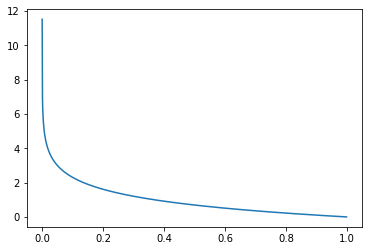

In [53]:
x = np.arange(0.00001, 1, 0.001)
y = -np.log(x)
plt.plot(x, y)